## Train Model and Visu : 
-> Besoin de définir un dataset f"ds_{name_ds}" et un args f"args_{ds_name}" d'abord pour que ça fonctionne

Si on souhaite load les paramètres issue d'un HP-tuning:
-  `trial_id = 'subway_in_STGCN_MSELoss_2024_12_04_14_37_57062'`
- `args,_ = load_configuration(trial_id,load_config=True,epochs=30)``

Sinon : 
- `from examples.benchmark import local_get_args`
- `model_name = 'STGCN'`
- `dataset_names = ['subway_in','netmob_POIs']`
- `vision_model_name = 'VariableSelectionNetwork'`
- `(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{})`

Pour l'entrainement et les visus:
- `load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)`

Si on souhaite visualiser quelque chose déjà entrainé : 
- `visualisation(trainer,ds_full_ds_subway,training_mode = 'test',station = ['CHA','GER','SOI','BON'])`


'pynvml' is not available on this environment.
Training and Hyper-parameter tuning with Ray is not possible

>>>>Training STGCN on ['subway_in', 'calendar']
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

U/Utarget size: torch.Size([6238, 4, 7])/torch.Size([6238, 4, 1]) Train/Valid/Test 3742 1248 1247
----------------------------------------
Fold n°0
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([2174, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  8696 

U/Utarget size: torch.Size([2078, 4, 7])/torch.Size([2078, 4, 1]) Train/Valid 1558 519
number of Parameters in Embedding Module: 829
Model size: 0.000GB
number of total parameters: 96094
number of trainable parameters: 96094

start training
epoch: 0 
 min\epoch : 0.04
Estimated time for training: 0.2min 

Training Throughput

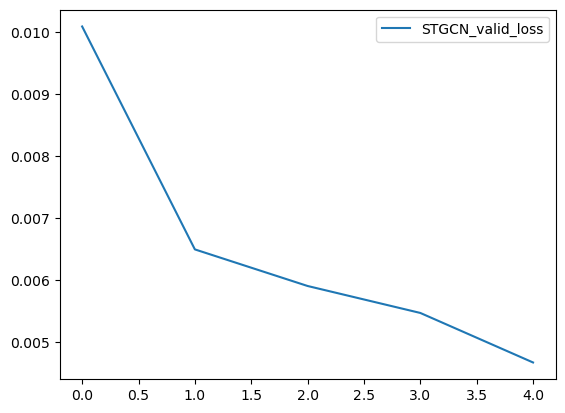

In [2]:
import sys
import os

# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    
from examples.benchmark import local_get_args,get_inputs,modification_contextual_args,get_trial_id,train_on_ds,keep_track_on_model_metrics
import matplotlib.pyplot as plt 
import pandas as pd 

dataset_for_coverage = ['subway_in','netmob_POIs'] 
dataset_names = ['subway_in','calendar']

save_folder = 'benchmark/fold0/'
df_loss,df_results = pd.DataFrame(),pd.DataFrame()
modification = {'epochs' : 5, #100,
                'set_spatial_units' : ['BON','SOI','GER','CHA'],
                }



model_names =['STGCN'] # ['CNN','LSTM','GRU','RNN','STGCN'] #'DCRNN','MTGNN'
print(f'\n>>>>Training {model_names[0]} on {dataset_names}')
# Tricky but here we net to set 'netmob' so that we will use the same period for every combination
args,folds,hp_tuning_on_first_fold = local_get_args(model_names[0],
                                                    args_init = None,
                                                    dataset_names=dataset_names,
                                                    dataset_for_coverage=dataset_for_coverage,
                                                    modification = modification)
K_fold_splitter,K_subway_ds,args = get_inputs(args,folds)
args = modification_contextual_args(args,modification)
trial_id = get_trial_id(args)
ds = K_subway_ds[0]

trainer,df_loss = train_on_ds(ds,args,trial_id,save_folder,df_loss)
metrics = trainer.metrics
df_results = keep_track_on_model_metrics(trainer,df_results,model_names[0],trainer,metrics)
for model_name in model_names[1:]:  # benchamrk on all the other models, with the same input base['MTGNN','STGCN', 'CNN', 'DCRNN']
    print(f'\n>>>>Training {model_name} on {dataset_names}')
    args,folds,hp_tuning_on_first_fold = local_get_args(model_name,
                                                        args_init = args,
                                                        dataset_names=dataset_names,
                                                        dataset_for_coverage=dataset_for_coverage,
                                                        modification = modification)
    trial_id = get_trial_id(args)
    trainer,df_loss = train_on_ds(ds,args,trial_id,save_folder,df_loss)
    metrics = trainer.metrics
    df_results = keep_track_on_model_metrics(trainer,df_results,model_name,trainer,metrics)

print(df_results)
df_loss[[f"{model}_valid_loss" for model in model_names]].plot()
plt.show()

In [1]:
from examples.train_model_on_k_fold_validation import load_configuration
from examples.train_and_visu_non_recurrent import update_args_train_visu, visualisation,load_all
from examples.benchmark import local_get_args

save_folder = 'benchmark/fold0/'
dataset_for_coverage = ['subway_in','netmob_POIs']

Training and Hyper-parameter tuning with Ray is not possible


# Training

In [2]:
model_name = 'STGCN'
dataset_names = ['calendar'] #'subway_in',  'netmob_POIs'
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 10,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 


Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)

>>>>Training STGCN on ['calendar']
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 

PREDICTION WILL BE BASED SOLELY ON CONTEXTUAL DATA !

Model size: 0.000GB
number of total parameters: 123710
number of trainable parameters: 123710

start training
epoch: 0 
 min\epoch : 0.08
Estimated time 

Loading BokehJS ...

In [3]:
model_name = 'STGCN'
dataset_names = ['netmob_POIs'] #'subway_in',  'netmob_POIs'
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 100,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 



>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)
mean_values:  torch.Size([1, 13])
tensor size:  torch.Size([4, 13])
mean_values repeated:  torch.Size([4, 13])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 13, 7]) Utarget size:  torch.Size([6238, 13, 1])
U_train size:  torch.Size([3742, 13, 7]) Utarget_train size:  torch.Size([3742, 13, 1])
U_valid size:  torch.Size([1248, 13, 7]) Utarget_valid size:  torch.Size([1248, 13, 1])
U_test size:  torch.Size([1247,

Loading BokehJS ...

In [2]:
# 1.24e-2
model_name = 'STGCN'
dataset_names = ['netmob_POIs','calendar'] #'subway_in',  'netmob_POIs'
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 100,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 


Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)
mean_values:  torch.Size([1, 13])
tensor size:  torch.Size([4, 13])
mean_values repeated:  torch.Size([4, 13])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 13, 7]) Utarget size:  torch.Size([6238, 13, 1])
U_train size:  torch.Size([3742, 13, 7]) Utarge

Loading BokehJS ...

In [6]:
model_name = 'STGCN'
dataset_names = ['subway_in'] #'subway_in',  'netmob_POIs', 'calendar'
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 100,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)

>>>>Training STGCN on ['subway_in']
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Model size: 0.001GB
number of total parameters: 188801
number of trainable parameters: 188801

start training
epoch: 0 
 min\epoch : 0.06
Estimated time for 

Loading BokehJS ...

In [7]:
model_name = 'STGCN'
dataset_names = ['subway_in','calendar'] #'subway_in',  'netmob_POIs', 'calendar'
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 100,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)

>>>>Training STGCN on ['subway_in', 'calendar']
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Model size: 0.001GB
number of total parameters: 238398
number of trainable parameters: 238398

start training


epoch: 0 
 min\epoch : 0.06
Estimated time for training: 4.9min 

Training Throughput:1673.56 sequences per seconds
>>> Training complete in: 0:04:16.401764
>>> Training performance time: min 0.014503240585327148 avg 0.019674301147460938 seconds (+/- 0.002571854202443986)
>>> Loading performance time: min 0.00013780593872070312 avg 0.010949946695799035 seconds (+/- 0.024820132288515928)
>>> Forward performance time: 0.005634519542136837 seconds (+/- 0.0007946468546668805)
>>> Backward performance time: 0.007341628034294788 seconds (+/- 0.0023550632694039216)
>>> Plotting performance time: 5.0669968730271465e-06 seconds (+/- 1.8893502400521084e-05)
>>> Saving performance time: 0.41079601645469666 seconds (+/- 0.1050958431011891)
>>> PI-tracking performance time: 5.808743563565341e-06 seconds (+/- 2.8890731315693434e-06)
>>> Scheduler-update performance time: 3.773756701536853e-06 seconds (+/- 2.248097660942585e-06)
>>> Peak Power during training: 80.972 W)
>>> Validation time: 0:00:00.2

Loading BokehJS ...

In [8]:
model_name = 'STGCN'
dataset_names = ['subway_in','netmob_POIs'] #'subway_in',
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 100,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)
mean_values:  torch.Size([1, 48])
tensor size:  torch.Size([4, 48])
mean_values repeated:  torch.Size([4, 48])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 48, 7]) Utarget size:  torch.Size([6238, 48, 1

Loading BokehJS ...

In [9]:
model_name = 'STGCN'
dataset_names = ['subway_in','netmob_POIs','calendar'] #'subway_in',
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 100,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)


mean_values:  torch.Size([1, 48])
tensor size:  torch.Size([4, 48])
mean_values repeated:  torch.Size([4, 48])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 48, 7]) Utarget size:  torch.Size([6238, 48, 1])
U_train size:  torch.Size([3742, 48, 7]) Utarget_train size:  torch.Size([3742, 48, 1])
U_valid size:  torch.Size([1248, 48, 7]) Utarget_valid size:  torch.Size([1248, 48, 1])
U_test size:  torch.Size([1247, 48, 7]) Utarget_test size:  torch.Size([1247, 48, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(1.4932)
U_test min:  tensor(0.) U_test max:  tensor(1.8552)
mean_values:  torch.Size([1, 90])
tensor size:  torch.Size([4, 90])
mean_values repeated:  torch.Size([4, 90])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 90, 7]) Utarget size:  torch.Size([6238, 90, 1])
U_train size:  torch.Size([3742, 90, 7]) Utarget_train size:  torch.Size([3742, 90, 1])


Loading BokehJS ...

In [13]:
# Feature extractor : 
print('Grad MAX Feature extractor (grn1,grn2,gate)')
for k in range(len(trainer.model.netmob_vision.model)):
    grad_align = trainer.model.netmob_vision.model[k].attn.grn.align.weight.grad.max()
    grad_fc1 = trainer.model.netmob_vision.model[k].attn.grn.dense1.weight.grad.max()
    grad_fc2 = trainer.model.netmob_vision.model[k].attn.grn.dense2.weight.grad.max()
    grad_gate = trainer.model.netmob_vision.model[k].attn.grn.gate.dense.weight.grad.max()

    print('\nSpatial unit ',k, ' attn weight: : ',grad_align.item(),grad_fc1.item(),grad_fc2.item(),grad_gate.item())
    if hasattr(trainer.model.netmob_vision.model[1],'fc1'):
        grad_transform1 = trainer.model.netmob_vision.model[k].fc1.weight.grad.max()
        grad_transform2 = trainer.model.netmob_vision.model[k].fc2.weight.grad.max()
        print('enhance linear: ',grad_transform1.item(),grad_transform2.item())

print('\nGrad MAX within st_blocks (tmp1,gcn,tmp2)')
for block in range(len(trainer.model.core_model.st_blocks)):
    grad_tmp1 = trainer.model.core_model.st_blocks[block].tmp_conv1.causal_conv.weight.grad.max()
    grad_gcn = trainer.model.core_model.st_blocks[block].graph_conv.graph_conv.weight.grad.max()
    grad_tmp2 = trainer.model.core_model.st_blocks[block].tmp_conv2.causal_conv.weight.grad.max()
    print('block ',block, ': ', grad_tmp1.item(),grad_gcn.item(),grad_tmp2.item())

Grad MAX Feature extractor (grn1,grn2,gate)

Spatial unit  0  attn weight: :  1.13552239611181e-07 1.2740189347937303e-08 3.4223185707560333e-07 1.9260023691458628e-06
enhance linear:  0.00023024558322504163 0.0002940127160400152

Spatial unit  1  attn weight: :  4.093305960850557e-06 3.439091960899532e-05 8.180391159839928e-05 0.00013169835438020527
enhance linear:  0.0001417446183040738 8.089123730314896e-05

Spatial unit  2  attn weight: :  6.225585025276814e-08 4.261230479585265e-09 2.222807324869791e-07 3.029856316061341e-06
enhance linear:  0.00044091124436818063 0.0008602149318903685

Spatial unit  3  attn weight: :  2.261346132570452e-08 4.515571916385852e-09 1.149858093185685e-07 1.331153953287867e-06
enhance linear:  0.0004250709607731551 0.0007394739659503102

Grad MAX within st_blocks (tmp1,gcn,tmp2)
block  0 :  0.00024111407401505858 0.00018022488802671432 0.00014721471234224737
block  1 :  0.00013489779666997492 0.00017841871886048466 0.0002979744749609381


In [2]:
model_name = 'STGCN'
dataset_names = ['subway_in','netmob_POIs']
vision_model_name = 'VariableSelectionNetwork'
concatenation_late = False
(args,_,_) = local_get_args(model_name,None,dataset_names,dataset_for_coverage,{'concatenation_late' : concatenation_late})
model_name = args.model_name

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 10,
                'set_spatial_units': args.set_spatial_units,
                'concatenation_late' : concatenation_late }


ds,trainer,df_results = load_all(model_name,args,dataset_for_coverage,modification,vision_model_name,save_folder,station=args.set_spatial_units)

40
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 



>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)
mean_values:  torch.Size([1, 54])
tensor size:  torch.Size([4, 54])
mean_values repeated:  torch.Size([4, 54])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 54, 7]) Utarget size:  torch.Size([6238, 54, 1])
U_train size:  torch.Size([3742, 54, 7]) Utarget_train size:  torch.Size([3742, 54, 1])
U_valid size:  torch.Size([1248, 54, 7]) Utarget_valid size:  torch.Size([1248, 54, 1])
U_test size:  torch.Size([1247,

Loading BokehJS ...

In [ ]:
# Feature extractor : 
print('Grad MAX Feature extractor (grn1,grn2,gate)')
for k in range(len(trainer.model.netmob_vision.model)):
    grad_align = trainer.model.netmob_vision.model[k].attn.grn.align.weight.grad.max()
    grad_fc1 = trainer.model.netmob_vision.model[k].attn.grn.dense1.weight.grad.max()
    grad_fc2 = trainer.model.netmob_vision.model[k].attn.grn.dense2.weight.grad.max()
    grad_gate = trainer.model.netmob_vision.model[k].attn.grn.gate.dense.weight.grad.max()

    print('Spatial unit ',k, ': ',grad_align.item(),grad_fc1.item(),grad_fc2.item(),grad_gate.item())

print('\nGrad MAX within st_blocks (tmp1,gcn,tmp2)')
for block in range(len(trainer.model.core_model.st_blocks)):
    grad_tmp1 = trainer.model.core_model.st_blocks[block].tmp_conv1.causal_conv.weight.grad.max()
    grad_gcn = trainer.model.core_model.st_blocks[block].graph_conv.graph_conv.weight.grad.max()
    grad_tmp2 = trainer.model.core_model.st_blocks[block].tmp_conv2.causal_conv.weight.grad.max()
    print('block ',block, ': ', grad_tmp1.item(),grad_gcn.item(),grad_tmp2.item())

: 

## Continue Training and update visu : 

In [3]:
trainer.train_and_valid()
visualisation(trainer,ds,training_mode = 'test',station = args.set_spatial_units)


start training

Training Throughput:127.28 sequences per seconds
>>> Training complete in: 0:05:40.827678
>>> Training performance time: min 0.22232913970947266 avg 0.24614429473876953 seconds (+/- 0.029554447941930236)
>>> Loading performance time: min 0.0003578662872314453 avg 0.1403109803922741 seconds (+/- 0.2876489769181094)
>>> Forward performance time: 0.07673922270357966 seconds (+/- 0.014844753741731304)
>>> Backward performance time: 0.16853173886536532 seconds (+/- 0.02499971398664679)
>>> Plotting performance time: 2.781550089518229e-06 seconds (+/- 1.1680077279964342e-06)
>>> Saving performance time: 3.57350492477417 seconds (+/- 1.9703907333778594)
>>> PI-tracking performance time: 4.185570610894098e-06 seconds (+/- 1.0549920268450777e-06)
>>> Scheduler-update performance time: 6.5962473551432294e-06 seconds (+/- 3.824618471627542e-06)
>>> Peak Power during training: 78.298 W)
>>> Validation time: 0:00:02.381508
Proportion of time consumed for Loading: 35.0%
Proportion o

Loading BokehJS ...

# Training with saved args
-> On récupère la config obtenue avec un HP tuning 

In [2]:
# Load config :
trial_id = 'subway_in_calendar_STGCN_MSELoss_2024_12_12_14_16_71587'
#'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_06_20_02_697'
args,_ = load_configuration(trial_id,load_config=True,epochs=30)
model_name = args.model_name
modification = {'epochs' : 50}
ds,trainer,df_results = load_all(args,modification,save_folder,station=args.set_spatial_units)


>>>> Load best CONFIG


Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

U/Utarget size: torch.Size([6238, 4, 7])/torch.Size([6238, 4, 1]) Train/Valid/Test 3742 1248 1247

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing

 ===== ERROR ==== 
Try with torch >= 2.0.0 (works with 2.0.1) to allow 'prefetch_factor' 
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing

>>>>Training STGCN on ['subway_in', 'calendar']
>>>>Model: STGCN; K_fold = 6; Loss function: MSE

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)



Training Throughput:1920.58 sequences per seconds
>>> Training complete in: 0:01:55.369098
>>> Training performance time: min 0.013889312744140625 avg 0.015488862991333008 seconds (+/- 0.0022142672494885438)
>>> Loading performance time: min 0.0006392002105712891 avg 0.00974835389968202 seconds (+/- 0.02212033384063764)
>>> Forward performance time: 0.0037694679282428587 seconds (+/- 0.00034084343336706615)
>>> Backward performance time: 0.006427737378038735 seconds (+/- 0.0014768708341195602)
>>> Plotting performance time: 4.656460820412149e-06 seconds (+/- 1.3618647206101286e-05)
>>> Saving performance time: 0.3161017894744873 seconds (+/- 0.08408047849287478)
>>> PI-tracking performance time: 4.841356861348055e-06 seconds (+/- 3.170381366377772e-06)
>>> Scheduler-update performance time: 8.421041527572943e-05 seconds (+/- 0.0002918001504432901)
>>> Peak Power during training: 78.704 W)
>>> Validation time: 0:00:00.167671
Proportion of time consumed for Loading: 46.4%
Proportion of 

Loading BokehJS ...

In [4]:
# Load config :
trial_id = 'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_04_12_25_63821'
args,_ = load_configuration(trial_id,load_config=True,epochs=30)

args.set_spatial_units = ['BON','SOI','GER','CHA']
args.num_nodes = len(args.set_spatial_units)
modification = {'epochs' : 30,
                'set_spatial_units': args.set_spatial_units}

ds,trainer,df_results = load_all(args,dataset_for_coverage,modification,save_folder,station=args.set_spatial_units)


>>>> Load best CONFIG
ARG:  vision_grn_h_dim
ARG:  vision_grn_out_dim
Considered Spatial-Unit:  ['BON', 'SOI', 'GER', 'CHA']

Init Dataset:  torch.Size([7392, 4])
Number of Nan Value:  tensor(0)
Total Number of Elements:  29568 

>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 4, 7]) Utarget size:  torch.Size([6238, 4, 1])
U_train size:  torch.Size([3742, 4, 7]) Utarget_train size:  torch.Size([3742, 4, 1])
U_valid size:  torch.Size([1248, 4, 7]) Utarget_valid size:  torch.Size([1248, 4, 1])
U_test size:  torch.Size([1247, 4, 7]) Utarget_test size:  torch.Size([1247, 4, 1])
U_train min:  tensor(0.) U_train max:  tensor(1.)
U_valid min:  tensor(0.) U_valid max:  tensor(0.9559)
U_test min:  tensor(0.) U_test max:  tensor(1.3371)
mean_values:  torch.Size([1, 17])
tensor size:  torch.Size([4, 17])
mean_values repeated:  torch.Size([4, 17])
>>>> Train/Valid/Test split method : similar_length_method

U size:  torch.Size([6238, 17, 7]) Utarget size:  to

## Load HP-tuning Configuration, analyse results.
-L'ajout de donnée contextuelles ne semble pas pertinent dans le cas général. 
- Résultats sans données contextuelles bien plus stables (5 premier résultats très proches)
- Résultats avec données contextuelles et concatenation late Mauvais
- Résultats avec données contextuelles et sans concaténation late: ok pour le premier, le reste assez en dessous de sans ajouts.

In [9]:
import pandas as pd 
import pickle 
folder = 'save/HyperparameterTuning'

trial_id = 'subway_in_STGCN_MSELoss_2024_12_07_04_28_42660'
# Contextual Data:  
#       # 'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_06_20_02_697'  

# Contextual Data with 'Concatenation Late' (residual?) :
#        # 'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_07_02_55_5679'  

# No Contextual Data  :
#        # 'subway_in_STGCN_MSELoss_2024_12_07_04_28_42660'
# 
trial_ids = ['subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_06_20_02_697',
             'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_07_02_55_5679',
             'subway_in_STGCN_MSELoss_2024_12_07_04_28_42660']

metric = '_metric/Loss_model'

for trial_id in trial_ids: 
    print('\n',trial_id)  

    df_hp_tuning =pd.read_csv(f'{folder}/{trial_id}.csv')
    model_args = pickle.load(open(f'{folder}/model_args.pkl','rb'))

    # Load common args through all tuning trials:
    args = model_args['model'][trial_id]['args']

    # Get best config :
    best_model = df_hp_tuning.sort_values(metric).iloc[0]
    dict_rename = {k : k.split('/')[-1] for k in df_hp_tuning.columns if ('_metric/' in k)|('config/' in k)|('scheduler/' in k)} #k[7:]
    df_hp_tuning_plot = df_hp_tuning.sort_values(metric).rename(columns = dict_rename)[dict_rename.values()]
    display(df_hp_tuning_plot.head())


 subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_06_20_02_697


,Loss_model,lr,weight_decay,dropout,vision_grn_out_dim,scheduler,torch_scheduler_milestone,torch_scheduler_gamma,torch_scheduler_lr_start_factor
0,0.002697,0.00140,0.031327,0.351308,16,NaN,NaN,NaN,NaN
34,0.002816,0.00110,0.068756,0.024426,8,True,86.143616,0.991538,0.170379
119,0.002872,0.00045,0.055030,0.217258,8,NaN,NaN,NaN,NaN
228,0.002872,0.00370,0.025379,0.377008,64,True,80.175104,0.994402,0.780289
231,0.002882,0.00050,0.028020,0.299761,8,NaN,NaN,NaN,NaN



 subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_07_02_55_5679


,Loss_model,lr,weight_decay,dropout,vision_vision_grn_out_dim,scheduler,torch_scheduler_milestone,torch_scheduler_gamma,torch_scheduler_lr_start_factor
33,0.002935,0.00125,0.048745,0.520862,8,True,80.707076,0.997103,0.57899
157,0.002948,0.00140,0.042796,0.409503,16,NaN,NaN,NaN,NaN
115,0.003006,0.00040,0.008457,0.247181,32,NaN,NaN,NaN,NaN
85,0.003051,0.00050,0.067096,0.147529,16,NaN,NaN,NaN,NaN
94,0.003061,0.00480,0.086484,0.268911,8,NaN,NaN,NaN,NaN



 subway_in_STGCN_MSELoss_2024_12_07_04_28_42660


,Loss_model,lr,weight_decay,dropout,scheduler,torch_scheduler_milestone,torch_scheduler_gamma,torch_scheduler_lr_start_factor
213,0.002671,0.00110,0.003774,0.065171,NaN,NaN,NaN,NaN
0,0.002679,0.00260,0.023833,0.151825,NaN,NaN,NaN,NaN
273,0.002681,0.00120,0.002992,0.029931,True,71.850898,0.998321,0.660200
9,0.002699,0.00110,0.039276,0.070477,True,90.170035,0.997541,0.706628
130,0.002725,0.00165,0.074895,0.007833,True,6.074265,0.996883,0.607111


## Explication possibles:
- Manques de données (très peu de samples)
- Ratio Données représentative / Mauvaise données éléevée (pluseurs centaines de time-series qui représentent probablement rien, donc beaucoup de bruit)
- Données de Mauvaise qualité

### Analyses:

In [3]:
from examples.train_model_on_k_fold_validation import load_configuration,load_k_fold_dataset
import numpy as np 
import torch 
import pandas as pd
from load_inputs.Lyon.netmob.netmob_POIs import load_data_npy
from load_inputs.Lyon.netmob.netmob_POIs import reduce_dim_by_clustering

trial_id = 'subway_in_netmob_POIs_STGCN_VariableSelectionNetwork_MSELoss_2024_12_06_20_02_697'
args,_ = load_configuration(trial_id,load_config=True,epochs=30)
modification = {'shuffle': False,
                }
folds = list(np.arange(args.K_fold))


>>>> Load best CONFIG
ARG:  vision_grn_out_dim


## Load K-fold datasets:

In [ ]:
ds_validation,args,dic_class2rpz = load_k_fold_dataset(args,folds,hp_tuning_on_first_fold=True)

## Load inputs from total train-set

In [2]:
inputs_train = [[x,y,x_c] for [x,y,x_c] in ds_validation[-1].dataloader['train']]
X = torch.cat([x for x,_,_ in inputs_train],dim=0)
Y = torch.cat([y for _,y,_ in inputs_train],dim=0)
nb_contextual = len(inputs_train[0][-1])
X_c = [torch.cat([x_c[k] for _,_,x_c in inputs_train],dim=0) for k in range(nb_contextual)]

## Clustering des éléments identiques: 

In [ ]:


station_ind  = 0
# Get TS 
multi_ts = pd.DataFrame(X_c[station_ind+4][:,:,-1])
start,end = ds_validation[-1].tensor_limits_keeper.first_predicted_train_date,ds_validation[-1].tensor_limits_keeper.last_predicted_train_date
dates = ds_validation[-1].tensor_limits_keeper.df_verif.iloc[:,-1]
dates = dates[(dates>=start)&(dates<end)]
multi_ts.index = dates

In [24]:
df_reduced = reduce_dim_by_clustering(multi_ts,epsilon= 0.3)
plot_TS(ts_plot,width = 1200,height=300,bool_show = True)

In [4]:

ROOT = '../../../../..'
FOLDER_PATH = 'data/rrochas/prediction_validation'

id_station = 'CHA'

data = load_data_npy(id_station,ROOT,FOLDER_PATH)
data = data.transpose(3,0,1,2)
data = data.reshape(data.shape[0],-1)
multi_ts = pd.DataFrame(data)

In [9]:
from plotting.TS_analysis import plot_TS
plot_TS(multi_ts.iloc[:,:10],width = 1200,height=300,bool_show = True)

Loading BokehJS ...

figure(id='p1046', ...)